# **Comparing the results of catigorical predictions between deep learning and machine learing models.**

---



Table of content



*   [Introduction](#intro)
*   [Data source](#DS)
      *   [Attribute Information](#AI)
*   [Data Preparation](#DP)
*   [Deep learning models](#DL)
      *   [Model 1](#ML1)
      *   [Model 2](#ML2)
      *   [Model 3](#ML3)
      *   [Model 4](#ML4)
*   [Machine Learning Models](#ML)
*   [Conclusion/Observation](#conclusion)



















### Introduction <a name="intro"></a>

The aim of this project is to compare the accuracy of deep learning models to simple traditional machine learning models, in predicting the catigorical output from a large data set.


### Data Source. <a name="DS"></a>

The data used for this project was obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#). The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


### Attribute Information. <a name="AI"></a>

A detailed breakdown of all the attributes in the data set can be found [here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#).

### Data preparation. <a name="DP"></a>

In [ ]:
#loading of the required libraries
import pandas as pd
import pydot as pyd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving bank-full.csv to bank-full (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['bank-full.csv']),sep=";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Viewing the number of rows and columns as well as investigating any null or NA values

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

There are a total of 17 columns to work with.

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


I will now use sklearn ordinal encoder to transform several of the catigoriacl columns into numeric values.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
columns_enc = OrdinalEncoder()
binary_columns = columns_enc.fit_transform(df[['job','marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','y' ]])

In [ ]:
df[['JOB','Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact','Month','Poutcome','Y']] = binary_columns

df1 = df.drop(['job','marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome','y'], axis=1)


The new data set now contains only numeric values.

In [ ]:
df1

,age,balance,day,duration,campaign,pdays,previous,JOB,Marital,Education,Default,Housing,Loan,Contact,Month,Poutcome,Y
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
1,44,29,5,151,1,-1,0,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
2,33,2,5,76,1,-1,0,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0
3,47,1506,5,92,1,-1,0,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0
4,33,1,5,198,1,-1,0,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45207,71,1729,17,456,2,-1,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,1.0
45208,72,5715,17,1127,5,184,3,5.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0,1.0
45209,57,668,17,508,4,-1,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,3.0,0.0


In [ ]:
#checking for any null values# 
df1.isnull().any().any()

False

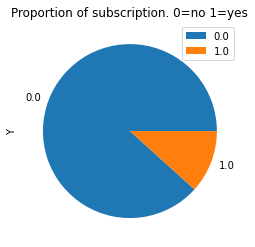

In [ ]:
Subscribe_rate = pd.DataFrame(df1.Y.value_counts())
Subscribe_rate.plot(y='Y',kind='pie', title="Proportion of subscription. 0=no 1=yes")


For the representation above we notice that the majority of respondents responded "No".

Now we form the feature and targer data set. The target will be the yes/no respondents while our feature set will contain values for ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome'].

In [ ]:
X = df1.drop("Y", axis=1)
Y = df1[['Y']]

In [ ]:
X.head(1)

,age,balance,day,duration,campaign,pdays,previous,JOB,Marital,Education,Default,Housing,Loan,Contact,Month,Poutcome
0,58,2143,5,261,1,-1,0,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0


In [ ]:
#normalization of X#
Xn= preprocessing.StandardScaler().fit(X).transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xn,Y, test_size=0.3, random_state=4)

### Deep Learning Models. <a name="DL"></a>

### Model 1. <a name="ML1"></a>
This will be a very basic neural network with 3 hidden layer.

In [ ]:
#A simple neural network#
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(400, activation=tf.nn.relu, input_shape=(16,)))
model1.add(tf.keras.layers.Dense(300, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(150, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(2) )
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 400)               6800      
_________________________________________________________________
dense_35 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_36 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_37 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 102       
Total params: 179,902
Trainable params: 179,902
Non-trainable params: 0
_________________________________________________________________


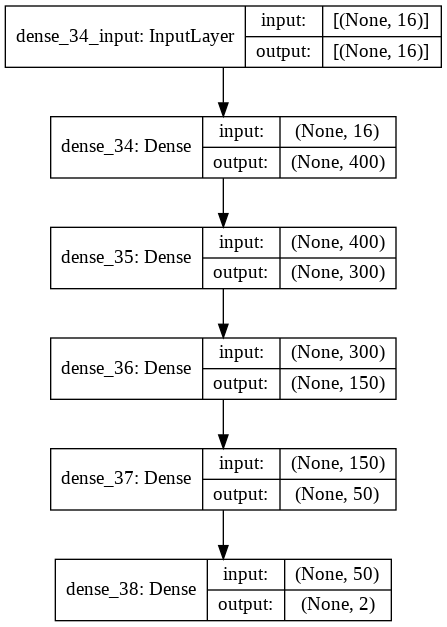

In [ ]:
tf.keras.utils.plot_model(model1, 'model.png', show_shapes=True)

Here we see a diagram of our network.

In [ ]:
model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

Here the model was trained for 69 epochs. Several other epochs were tested (100,150, 200, 250) but the best results were obtained from just 60 epochs.

In [ ]:
history = model1.fit(x=X_train, y=Y_train,batch_size=32,epochs=50, verbose=1)

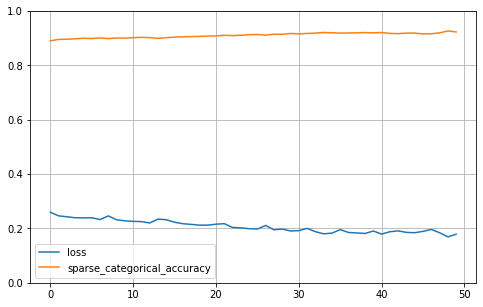

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


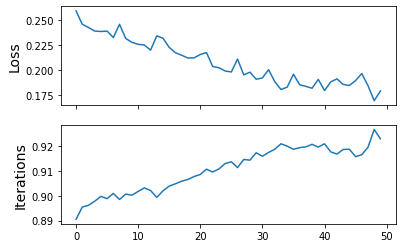

In [ ]:
history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
acc_values = history_dict['sparse_categorical_accuracy']
epochs = range(1, len(loss_values)+1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values)
axes[1].set_ylabel("Iterations", fontsize=14)
axes[1].plot(acc_values)
plt.show()

In [ ]:
m0 = model1.evaluate(X_train, Y_train)
print("Accuracy on train data =",m0)

m1 = model1.evaluate(X_test, Y_test)
print("Accuracy on test data =",m1)


989/989 [==============================] - 1s 1ms/step - loss: 0.1620 - sparse_categorical_accuracy: 0.9267
Accuracy on train data = [0.16204096376895905, 0.9267228841781616]
424/424 [==============================] - 1s 1ms/step - loss: 0.2437 - sparse_categorical_accuracy: 0.8934
Accuracy on test data = [0.24365437030792236, 0.8933942914009094]


Model 1 had an accuracy of 89% on test data.

### Model 2. <a name="ML2"></a>

Here we use a single input deep and wide network.

In [ ]:
#slightly more complex second model#
input=tf.keras.layers.Input(shape=[16])

hiddenA= tf.keras.layers.Dense(400, activation=tf.nn.relu)(input)
hiddenB = tf.keras.layers.Dense(100, activation=tf.nn.relu)(hiddenA)

concat = tf.keras.layers.Concatenate()([input,hiddenB])
output = tf.keras.layers.Dense(2)(concat)
model2 = tf.keras.models.Model(inputs=[input], outputs=[output])

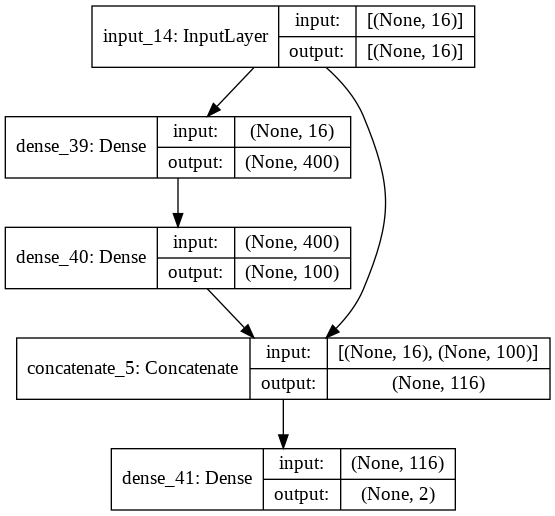

In [ ]:
tf.keras.utils.plot_model(model2, 'model.png', show_shapes=True)

In [ ]:

model2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history2 = model2.fit(x=X_train, y=Y_train,batch_size=32,epochs=150, verbose=1)

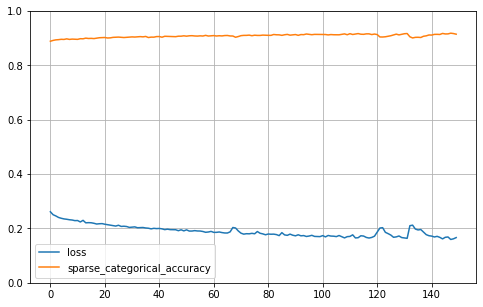

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

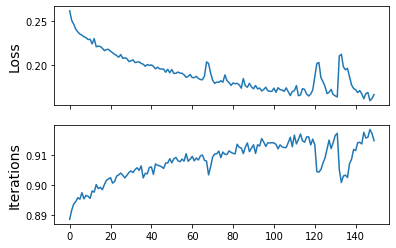

In [ ]:
history_dict = history2.history
history_dict.keys()
loss_values = history_dict['loss']
acc_values = history_dict['sparse_categorical_accuracy']
epochs = range(1, len(loss_values)+1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values)
axes[1].set_ylabel("Iterations", fontsize=14)
axes[1].plot(acc_values)
plt.show()

In [ ]:
m2 = model2.evaluate(X_train, Y_train)
print("Accuracy on train data =",m2)
m3 = model2.evaluate(X_test, Y_test)
print("Accuracy on test data =",m3)

989/989 [==============================] - 1s 1ms/step - loss: 0.1469 - sparse_categorical_accuracy: 0.9206
Accuracy on train data = [0.14685459434986115, 0.9205611944198608]
424/424 [==============================] - 0s 1ms/step - loss: 0.4163 - sparse_categorical_accuracy: 0.8910
Accuracy on test data = [0.4162547290325165, 0.8909613490104675]


Our accuracy remained relatively the same.

### Model 3. <a name="ML3"></a>

Here we use the deep and wide model but different feature subsets are sent to different parts of the network

In [ ]:
#model 3#

input_AX = tf.keras.layers.Input(shape=[8])

input_Axi = tf.keras.layers.Dense(300, activation=tf.nn.relu)(input_AX)
input_Axi1 = tf.keras.layers.Dense(150, activation=tf.nn.relu)(input_Axi)

input_BX = tf.keras.layers.Input(shape=[16])

hidden1X = tf. keras.layers.Dense(300, activation=tf.nn.relu)(input_BX)


concatX = tf.keras.layers.concatenate([input_Axi1, hidden1X])
outputX = tf.keras.layers.Dense(2)(concatX)
model3 = tf.keras.models.Model(inputs=[input_AX, input_BX], outputs=[outputX])


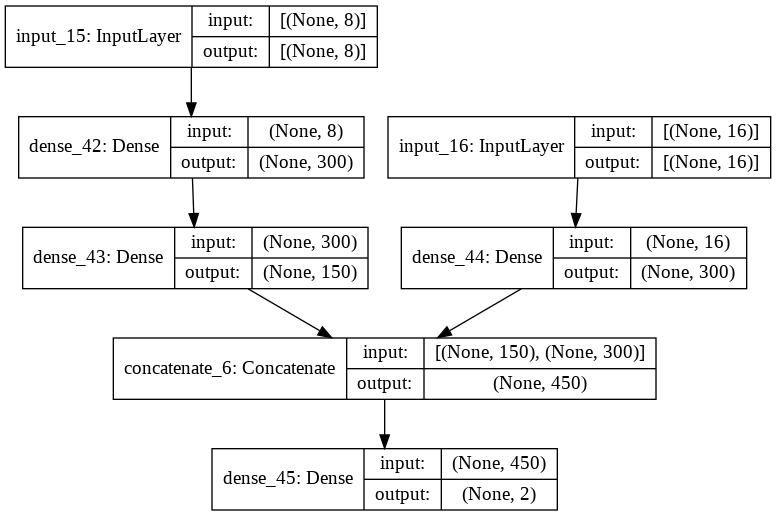

In [ ]:
tf.keras.utils.plot_model(model3, 'model.png', show_shapes=True)

In [ ]:

model3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
X_train_aa, X_train_bb = X_train[:,:8], X_train
X_testtt, X_tess = X_test[:,:8], X_test


Different train and test splits are needed because the network is feed with multiple input feature sets.

In [ ]:
history3 = model3.fit(x=[X_train_aa,X_train_bb], y=Y_train,batch_size=32,epochs=350, verbose=1)

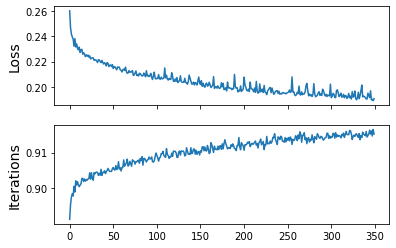

In [ ]:
history_dict3 = history3.history
history_dict3.keys()
loss_values3 = history_dict3['loss']
acc_values3 = history_dict3['sparse_categorical_accuracy']
epochs3 = range(1, len(loss_values3)+1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values3)
axes[1].set_ylabel("Iterations", fontsize=14)
axes[1].plot(acc_values3)
plt.show()

In [ ]:
mod3i = model3.evaluate([X_train_aa, X_train_bb], Y_train)
print("Accuracy on train data =",mod3i)
mod3 = model3.evaluate([X_testtt, X_tess], Y_test)
print("Accuracy on test data =",mod3)

989/989 [==============================] - 1s 1ms/step - loss: 0.1867 - sparse_categorical_accuracy: 0.9178
Accuracy on train data = [0.18674594163894653, 0.9178436994552612]
424/424 [==============================] - 0s 1ms/step - loss: 0.4545 - sparse_categorical_accuracy: 0.9004
Accuracy on test data = [0.4545351266860962, 0.9003981351852417]


Model 3 produced the best results so far at 90% on the training set.

### Model 4. <a name="ML4"></a>

Here we try a more complex deep wide structure with multiple feature input subsets. The idea behind this is to pass the simplier binary columns directly to the concat layer while the other columns will be passed deeper into the network. We'll test to see whether this has an impact on the accuracy.

In [ ]:
#house, loan, default#
In_1 = tf.keras.layers.Input(shape=[11])
In_2 = tf.keras.layers.Input(shape=[12])
In_3 = tf.keras.layers.Input(shape=[13])
In_4 = tf.keras.layers.Input(shape=[16])

IN1 = tf.keras.layers.Dense(300, activation=tf.nn.relu)(In_4)



H1 = tf.keras.layers.Dense(300, activation=tf.nn.relu)(In_2)
H2 = tf.keras.layers.Dense(100, activation=tf.nn.relu)(H1)

H1a = tf.keras.layers.Dense(300, activation=tf.nn.relu)(In_1)
H2a = tf.keras.layers.Dense(100, activation=tf.nn.relu)(H1a)

H1b = tf.keras.layers.Dense(300, activation=tf.nn.relu)(In_3)
H2b = tf.keras.layers.Dense(100, activation=tf.nn.relu)(H1b)

concat2 = tf.keras.layers.concatenate([IN1, H2a, H2, H2b])
output2 = tf.keras.layers.Dense(2)(concat2)
model4 = tf.keras.models.Model(inputs=[In_1, In_2, In_3, In_4], outputs=[output2])


In [ ]:
X_train_11, X_train_12 , X_train_13, X_train_full = X_train[:,:11], X_train[: ,:12], X_train[:,:13], X_train
X_test_11, X_test_12 , X_test_13, X_test_full = X_test[:,:11], X_test[: ,:12], X_test[:,:13], X_test

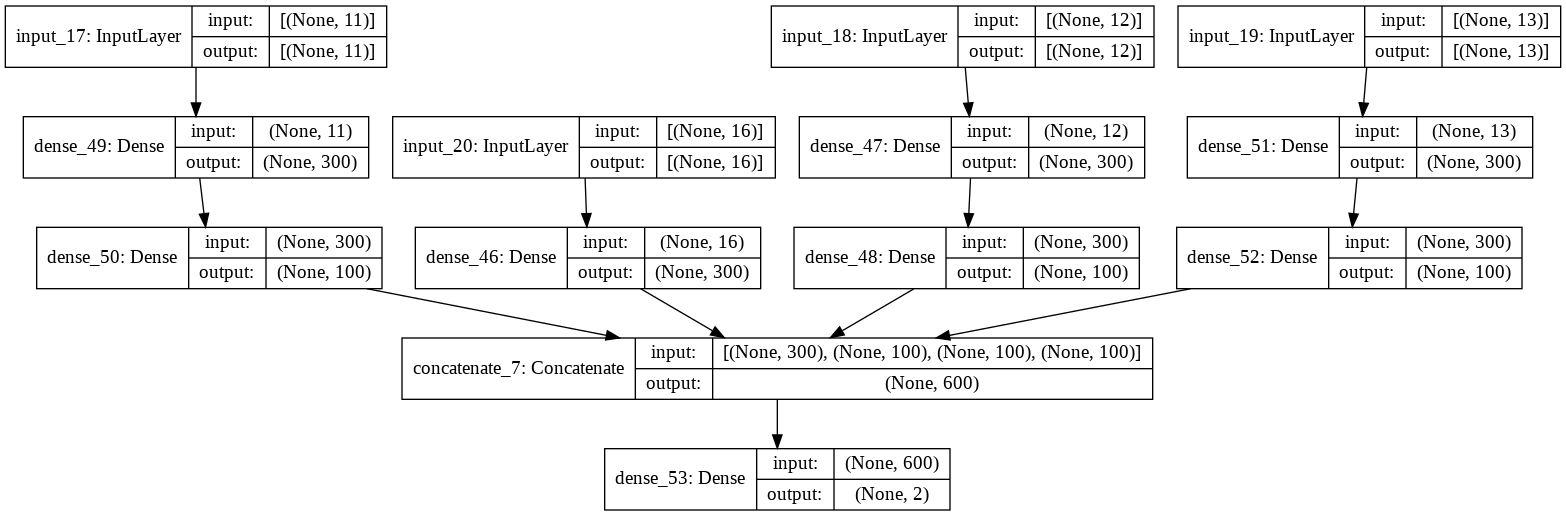

In [ ]:
tf.keras.utils.plot_model(model4, 'model.png', show_shapes=True)

A more complex network design.

In [ ]:

model4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history4 = model4.fit(x=[X_train[:,:11], X_train[: ,:12], X_train[:,:13], X_train],y=Y_train,batch_size=32,epochs=350, verbose=1)

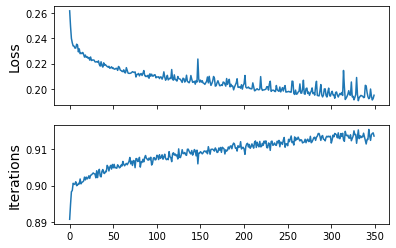

In [ ]:
history_dict4 = history4.history
history_dict4.keys()
loss_values4 = history_dict4['loss']
acc_values4 = history_dict4['sparse_categorical_accuracy']
epochs4 = range(1, len(loss_values4)+1)

fig, axes = plt.subplots(2, sharex=True)
axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(loss_values4)
axes[1].set_ylabel("Iterations", fontsize=14)
axes[1].plot(acc_values4)
plt.show()

In [ ]:
mx = model4.evaluate([X_train_11, X_train_12 , X_train_13, X_train_full], Y_train)
print("Accuracy on train data =",mx)
mxi = model4.evaluate([X_test_11, X_test_12 , X_test_13, X_test_full], Y_test)
print("Accuracy on test data =",mxi)

989/989 [==============================] - 1s 1ms/step - loss: 0.1898 - sparse_categorical_accuracy: 0.9162
Accuracy on train data = [0.18982234597206116, 0.916200578212738]
424/424 [==============================] - 1s 1ms/step - loss: 0.4210 - sparse_categorical_accuracy: 0.9017
Accuracy on test data = [0.4210164546966553, 0.901725172996521]


Model 4 produced roughly the same accuracy as model 3 on the test data. The slightly more complexed models produced the best result so far. Sending different numbers of feature sets to different parts of the neural network generally improved test accuracy.

---



### Machine learning models. <a name="ML"></a>

Here we will test the accuracies of

*   Random forest
*   Support vector machine (SVM)
*   Logistic regression
*   Hard voting classifier
*   Soft voting classifier






In [ ]:
#reshaping the y training set#
y_train = np.array(Y_train)
y_train = y_train.ravel()

y_test = np.array(Y_test)
y_test = y_test.ravel()

In [ ]:
#loading our predictive models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", probability=True, random_state=42)


voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,...
                                        

In [ ]:
#testing model accuracy

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf_soft, voting_clf_hard):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8942789737540549
RandomForestClassifier 0.9013565319964613
SVC 0.9027572987319374
VotingClassifier 0.903420819817163
VotingClassifier 0.9029047478619876


Random Forest, SVC and the both voting classifiers acheived roughly the same accuracy as the best neural network models (3&4). Logistic regression had just a slightly lower accuracy.

### Conclusion/Observations <a name="conclusion"></a>

I observed that the tested ML algorithms generally produced the same accuracy as the best designed neural networks. Neural networks work best with larger datasets so, having over 45k rows, this dataset was chosen with that in mind. Perhaps better results can be acheived by:
1.   Testing other neural network architectures.
2.   Hyper parameter tuning of both the ML and nueral networks.

It is also worth noting that the ML algorithms to less effort and time to design and run. From the initial results obtained, it could be suggested that ML algorithms might be the best choise for this particular data set.

As this is a work in progress, I will revisit this notebook in hopes of getting an even better accuracy score.

Any suggestions and feedback would be appreciated :).




